# Checking data matches

In this notebook we will check that the geographical data used as inputs for the Save The Turtles project is complete and that the data fields are consistent across the files.

The model requires four input files:
1. travel matrix
1. activity data
1. scenario data
1. clinic data

The *travel matrix* contains the distance from each patient postcode sector to the clinic
The *activity data* contains the number of admissions from each patient postcode sector for each treatment function, defined as either new admission or followup admission
The *scenario data* contains the proportion of admissions for each treatment function that are seen virtually, defined as either new admission or followup admission
The *clinic data* defines which clinic location is open for each treatment function

As there are the same fields across the four input files, this notebook checks that the fields are complete across the four files. And also future proofs the model by making sure that all of the possible postcode sectors are included.

## Part 1: Summary of the fields in each input file

Import libraries

In [1]:
import pandas as pd

Open data files

In [2]:
input_folder = "dummy_data"

# read in three data files
travel_matrix = pd.read_csv(f'{input_folder}/210528_travelMatrix.csv')
activity_data = pd.read_csv(f'{input_folder}/dummy_activity_data.csv')
scenario_data = pd.read_csv(f'{input_folder}/dummy_scenarios_data.csv')
#clinic_data =  pd.read_csv(f'{input_folder}/clinics.csv')

The content of the travel matrix
(travel_matrix has pc sector and clinic location)

In [3]:
print (f'Travel matrix has {travel_matrix.shape[0]} postcode sectors')
print (f'Travel matrix has {travel_matrix.shape[1] - 1} clinic locations')

Travel matrix has 107 postcode sectors
Travel matrix has 3 clinic locations


The content of the activity data
(activity_data has pc sector and treatment function (for followup and new))

In [4]:
activity_column_names = activity_data.columns
print (f'Activity data has {activity_data["pc_sector"].nunique()} postcode sectors')
print (f'Activity data has {activity_data["treatment_function"].nunique()} treatment functions')
print (f'Activity data calls the two admission splits: {activity_column_names[-2]} and {activity_column_names[-1]}')

Activity data has 107 postcode sectors
Activity data has 80 treatment functions
Activity data calls the two admission splits: total_new_adms and total_followup_adms


The content of the scenarios data
(scenarios_data has treatment function (for followup and new))

In [5]:
scenario_column_names = scenario_data.columns
print (f'Scenario data has {scenario_data["treatment_function"].nunique()} treatment functions')
print (f'Scenario data has {scenario_data["scenario_title"].nunique()} scenarios')
print (f'Scenario data calls the two admission splits: {scenario_column_names[-2]} and {scenario_column_names[-1]}')

Scenario data has 67 treatment functions
Scenario data has 3 scenarios
Scenario data calls the two admission splits: pc_followup_adms_virtual and pc_new_adms_virtual


The content of the clinic data

In [6]:
print("yet to do")

yet to do


## Part 2 Comparing fields across files

### Comparing treatment function content across files

In [7]:
scenario_tf = list(scenario_data["treatment_function"].unique())
activity_tf = list(activity_data["treatment_function"].unique())

only_in_scen = list(set(scenario_tf) - set(activity_tf))
only_in_activity = list(set(activity_tf) - set(scenario_tf))

print (f'Here are the {len(only_in_activity)} treatment functions included in the Activity data and not in the Scenario data:')
print(only_in_activity)
print ()

print (f'Here are the  {len(only_in_scen)} treatment functions included in the Scenario data and not in the Activity data:')
print(only_in_scen)

Here are the 15 treatment functions included in the Activity data and not in the Scenario data:
['109_bariatric_surgery_service', '370_medical_oncology', '677_gastrointestinal_physiology_service', '311_clinical_genetics', '170_cardiothoracic_surgery', '145_oral_and_maxillofacial_surgery_service', '505_fetal_medicine_service_', '670_urological_physiology_service', '007_non_consultant', '000_dummy_treatment_function', '110_trauma_and_orthopaedic_service', '347_sleep_medicine_service', '461_ophthalmic_and_vision_science_service', '675_cardiac_physiology_service', '950_nursing_episode']

Here are the  2 treatment functions included in the Scenario data and not in the Activity data:
['110_trauma_and_orthopaedics', '140_oral_surgery']


### Comparing postcode sector content across files

In [8]:
travel_pc = list(travel_matrix["pc_sector"].unique())
activity_pc = list(activity_data["pc_sector"].unique())

only_in_travel = list(set(travel_pc) - set(activity_pc))
only_in_activity = list(set(activity_pc) - set(travel_pc))

print (f'Here are the {len(only_in_activity)} postcode sectors included in the Activity data and not in the Travel data:')
print(only_in_activity)
print ()

print (f'Here are the  {len(only_in_scen)} postcode sectors included in the Travel data and not in the Activity data:')
print(only_in_travel)

Here are the 2 postcode sectors included in the Activity data and not in the Travel data:
['TR27 9', 'TR11 9']

Here are the  2 postcode sectors included in the Travel data and not in the Activity data:
['PL14 9', 'TR14 4']


### Comparing clinic content across files

In [9]:
# yet to do

# Part 3: Complete postcode sector list for Cornwall
We have seen already that the travel matrix does not contain all of the postcode sectors that are in the activity data. To future proof the model we need to have all of the Cornish postcode sectors in the travel matrix.

Plot a map of the county, and the postcode sectors to see what we are wanting to include.

We will use geopandas. Import libraries

In [10]:
import geopandas as gpd

In [11]:
pc_sector_shp = gpd.read_file("shapefiles/GB_Postcodes/PostalSector_cornwall.shp")#zip://./data/ne_110m_admin_0_countries.zip")
pc_sector_shp.head()

,RMSect,postcode_s,geometry
0,EX22 6,EX22 6,"POLYGON ((225644.810 101345.299, 225668.440 10..."
1,EX22 7,EX22 7,"POLYGON ((225769.945 103753.740, 225554.773 10..."
2,EX23 0,EX23 0,"POLYGON ((212647.510 94907.892, 212649.002 949..."
3,EX23 8,EX23 8,"MULTIPOLYGON (((220156.905 107457.860, 220205...."
4,EX23 9,EX23 9,"MULTIPOLYGON (((221173.447 117412.880, 221181...."


<AxesSubplot:>

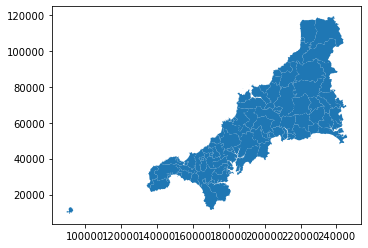

In [12]:
pc_sector_shp.plot()

In [13]:
filename = ("shapefiles/county_boundaries/devon_county.shp")

county_devon_shp = gpd.read_file(filename, 
                             crs='EPSG:4326')
county_devon_shp = county_devon_shp.to_crs(epsg=27700)

county_devon_shp.head()

,objectid,ctyua16cd,ctyua16nm,ctyua16nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,130,E10000008,Devon,None,283141,93082,-3.65701,50.725559,6.567162e+09,1.066743e+06,"MULTIPOLYGON (((275519.320 151188.994, 275521...."


<AxesSubplot:>

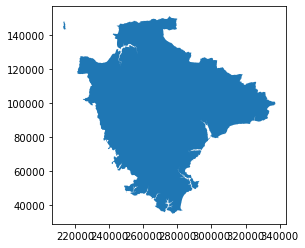

In [14]:
county_devon_shp.plot()

In [26]:
filename = ("shapefiles/county_boundaries/cornwall_county.shp")

county_cornwall_shp = gpd.read_file(filename, 
                             crs='EPSG:4326')
county_cornwall_shp = county_cornwall_shp.to_crs(epsg=27700)

Plot the shapfiles on the same map

[(130000.0, 260000.0), (0.0, 120000.0)]

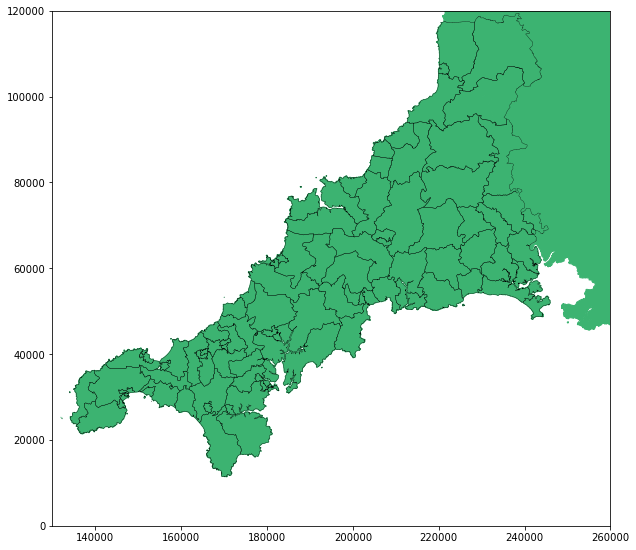

In [27]:
ax = pc_sector_shp.plot(figsize=(10, 10),  zorder=2,
                        linewidth=0.3, edgecolor='k', facecolor='none')#, #alpha=0.8, areacolor='none')

#ax.set_axis_off()
county_devon_shp.plot(ax=ax, zorder=1, edgecolor='mediumseagreen', facecolor='mediumseagreen')#1 is at bottom
county_cornwall_shp.plot(ax=ax, zorder=1, edgecolor='mediumseagreen', facecolor='mediumseagreen')#1 is at bottom
ax.set(xlim=(130000, 260000), ylim=(0, 120000))

# Part 3: Get full list of postcode sectors in cornwall.

From https://www.doogal.co.uk/AdministrativeAreas.php?district=E06000052 download document to get access to the file "Cornwall postcodes.csv". 

Want to extract the unique postcode sectors that are currently in use. 
Take the Postcode column and extract the postcode sector (the first block of characters, plus the first character following the space).

Import libraries

In [17]:
import numpy as np

Define a function to return the unique instances of a list

In [18]:
def unique(list1):
# function to get unique values in a list
    x = np.array(list1)
    return(np.unique(x))

Read in data and include on those rows that are in use.

In [19]:
# read in data file
df = pd.read_csv('shapefiles/Cornwall postcodes.csv')

#Only include those that are in use
df = df[df["In Use?"] == "Yes"]

Take the postcode column, and split it into two, based on the whitespace

In [20]:
pc_split = df['Postcode'].str.split()

For each postcode (split into two), create the postcode sector by taking the first half and adding on the first character of the second half

In [21]:
cornish_pc_sector = []
cornish_pc_area = []

for i in range(pc_split.shape[0]):
    cornish_pc_sector.append(pc_split.iloc[i][0] + " " + pc_split.iloc[i][1][0])
    cornish_pc_area.append(pc_split.iloc[i][0])

Take the unique occurances

In [22]:
cornish_pc_sector = unique(cornish_pc_sector)
cornish_pc_area = unique(cornish_pc_area)

Create dataframes to output the values as a file

In [23]:
df1 = pd.DataFrame(cornish_pc_sector, columns=["postcode_sector"])
df2 = pd.DataFrame(cornish_pc_area, columns=["postcode_area"])

df1.to_csv("shapefiles/cornwall_postcode_sectors.csv",index=False)
df2.to_csv("shapefiles/cornwall_postcode_areas.csv",index=False)

# Part 4: Compare the list of postcode sectors in the geographical model inputs with this complete list of postcode sectors

In [24]:
not_in_travel = list(set(cornish_pc_sector) - set(travel_pc))
not_in_activity = list(set(cornish_pc_sector) - set(activity_pc))
not_in_both = list(set(not_in_activity+not_in_travel))

only_in_travel = list(set(travel_pc) - set(cornish_pc_sector))
only_in_activity = list(set(activity_pc) - set(cornish_pc_sector))

print (f'Here are the {len(not_in_activity)} postcode sectors included in the full list and not in the activity data:')
print(not_in_activity)
print ()

print (f'Here are the  {len(not_in_travel)} postcode sectors included in the full list and not in the Travel data:')
print(not_in_travel)
print ()

print (f'Here are the {len(not_in_both)} postcode sectors included in the full list and not in both the activity & travel data:')
print(not_in_both)
print ()


print (f'Here are the {len(only_in_activity)} postcode sectors included in the activity data and not in the full list:')
print(only_in_activity)
print ()

print (f'Here are the  {len(only_in_travel)} postcode sectors included in the Travel data and not in the full list:')
print(only_in_travel)

Here are the 14 postcode sectors included in the full list and not in the activity data:
['TR26 9', 'PL12 9', 'PL31 9', 'TR14 4', 'PL27 9', 'TR15 9', 'TR7 9', 'PL15 0', 'TR13 3', 'PL13 9', 'TR18 9', 'EX23 3', 'PL14 9', 'PL17 0']

Here are the  14 postcode sectors included in the full list and not in the Travel data:
['TR26 9', 'PL12 9', 'PL31 9', 'TR27 9', 'TR11 9', 'PL27 9', 'TR15 9', 'TR7 9', 'PL15 0', 'TR13 3', 'PL13 9', 'TR18 9', 'EX23 3', 'PL17 0']

Here are the 16 postcode sectors included in the full list and not in both the activity & travel data:
['TR26 9', 'PL12 9', 'PL31 9', 'TR27 9', 'TR11 9', 'TR14 4', 'PL27 9', 'TR15 9', 'TR7 9', 'PL15 0', 'TR13 3', 'PL13 9', 'TR18 9', 'EX23 3', 'PL14 9', 'PL17 0']

Here are the 4 postcode sectors included in the activity data and not in the full list:
['TR22 0', 'TR25 0', 'TR23 0', 'TR24 0']

Here are the  4 postcode sectors included in the Travel data and not in the full list:
['TR22 0', 'TR25 0', 'TR23 0', 'TR24 0']


# Conclusions

Currently we need to add 14 postcode sectors to the travel matrix so that there is a full list of Cornish postcode sectors in the travel matrix to future proof the model.

Need to make sure the same treatment functions are present in both the Activity data and Scenario data. Need to add 16 treatment functions to the Scenario data, and two to the Activity data to make them match.